<a href="https://colab.research.google.com/github/mayraberrones94/Ciencia_de_Datos/blob/master/Tarea2_soccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt 
import numpy as np

**Prueba 2**

Solo para ver si se hacen los cambios

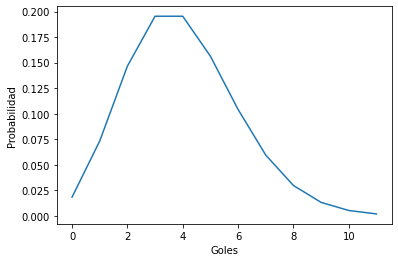

In [ ]:
lam = 4
dist = poisson(lam)
type(dist)


k = [0, 1, 2, 3, 4, 5,6, 7,8,9, 10, 11]
dist.pmf(k)

plt.plot(dist.pmf(k))
plt.xlabel('Goles')
plt.ylabel('Probabilidad')
plt.savefig('goles.png',dpi=300)

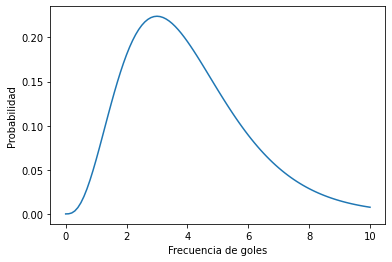

In [ ]:
from scipy.stats import gamma

alpha = 4
qs = np.linspace(0, 10, 101)
ps = gamma(alpha).pdf(qs)

plt.plot(qs, ps)
plt.xlabel('Frecuencia de goles')
plt.ylabel('Probabilidad')
plt.savefig('gamma.png',dpi = 300)

In [ ]:
!pip install thinkbayes2




  Created wheel for thinkbayes2: filename=ThinkBayes2-2.0.0-cp36-none-any.whl size=24806 sha256=20dcaa0b0b22957822d129357c8412024d02b39ef30b83279e7894eb49bcfa91
  Stored in directory: /root/.cache/pip/wheels/71/92/6f/fe5b61ae2fa085aa5ff7551f2f7b1e43005bd7cf031a2789a4
Successfully built thinkbayes2


In [ ]:
!pip install empiricaldist


  Created wheel for empiricaldist: filename=empiricaldist-0.6.0-cp36-none-any.whl size=10357 sha256=42eb06577140b8a27f81445e334f5b78157134093b94a14c5e2c71591c5ccd8c
  Stored in directory: /root/.cache/pip/wheels/a7/18/38/f4791357371b1d677a885149b397cb1437c0ea88939ab642e7
Successfully built empiricaldist


In [ ]:


from empiricaldist import Pmf

prior = Pmf(ps, qs)
prior.normalize()

9.900380070364681

In [ ]:
def update_poisson(pmf, data):
    """Update Pmf with a Poisson likelihood."""
    k = data
    lams = pmf.qs
    likelihood = poisson(lams).pmf(k)
    pmf *= likelihood
    pmf.normalize()

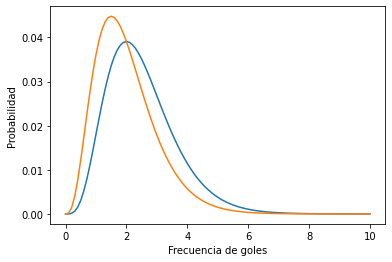

In [ ]:
tigres = prior.copy()
update_poisson(tigres, 0)

bayern = prior.copy()
update_poisson(bayern, 1)

plt.plot(bayern)
plt.plot(france)
plt.xlabel('Frecuencia de goles')
plt.ylabel('Probabilidad')
plt.savefig('final.png',dpi = 300)

In [ ]:
def prob_gt(pmf1, pmf2):
    """Compute the probability of superiority."""
    total = 0
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            if q1 > q2:
                total += p1 * p2
    return total

In [ ]:
prob_gt(bayern, tigres)

0.6229785132687082